In [1]:
using Pkg
Pkg.activate("/Users/heerakbanerjee/Documents/Newtrinos.jl")
Pkg.add("Revise")
Pkg.add("JuliaInterpreter")
Pkg.add("SpecialFunctions")
Pkg.update()

  Activating project at `~/Documents/Newtrinos.jl`
   Resolving package versions...
      Compat entries added for 
  No Changes to `~/Documents/Newtrinos.jl/Project.toml`
  No Changes to `~/Documents/Newtrinos.jl/Manifest.toml`
Precompiling project...
   1338.2 ms  ✓ libwebp_jll
   1984.9 ms  ✓ MLJModelInterface
   2827.9 ms  ✓ KernelDensity
   3084.6 ms  ✓ Clustering
   3052.3 ms  ✓ MCMCDiagnosticTools
   5174.7 ms  ✓ KernelAbstractions
   1561.1 ms  ✓ KernelAbstractions → LinearAlgebraExt
   1571.0 ms  ✓ StructArrays → StructArraysGPUArraysCoreExt
   5570.5 ms  ✓ WebP
   2179.5 ms  ✓ KernelAbstractions → SparseArraysExt
   1315.6 ms  ✓ HeterogeneousComputing → HeterogeneousComputingKernelAbstractionsExt
   1712.5 ms  ✓ RecursiveArrayTools → RecursiveArrayToolsKernelAbstractionsExt
   3865.6 ms  ✓ LinearSolve → LinearSolveKernelAbstractionsExt
   4797.7 ms  ✓ GPUArrays
  13385.1 ms  ✓ BAT
   8393.5 ms  ✓ BAT → BATHDF5Ext
   8432.3 ms  ✓ BAT → BATOptimizationExt
   8500.3 ms  ✓ BAT → 

In [ ]:
VERSION
Base.Sys.BINDIR

In [2]:
Pkg.instantiate()

In [3]:
using Revise
using Newtrinos
using Plots

In [4]:
physics = (sns_flux = Newtrinos.sns_flux.configure(),)
e = Newtrinos.coherent_csi.configure(physics)
p = Newtrinos.get_params(e)

┌ Info: Loading coherent csi data
└ @ Newtrinos.coherent_csi /Users/heerakbanerjee/Documents/Newtrinos.jl/src/experiments/coherent/coherent_2020/coherent_csi.jl:71


(Rn_Cs = 5.7242, Rn_I = 5.7242, cevns_xsec_a = 0.0, cevns_xsec_b = 0.0, cevns_xsec_c = 0.0, cevns_xsec_d = 0.0, coherent_csi_eff_a = 1.32045, coherent_csi_eff_b = 0.285979, coherent_csi_eff_c = 10.8646, coherent_csi_eff_d = -0.333322, coherent_csi_qfa_a = 0.0554628, coherent_csi_qfa_b = 4.30681, coherent_csi_qfa_c = -111.707, coherent_csi_qfa_d = 840.384, sns_nu_per_POT = 0.0848)

Total expected counts: 400.46277046697975


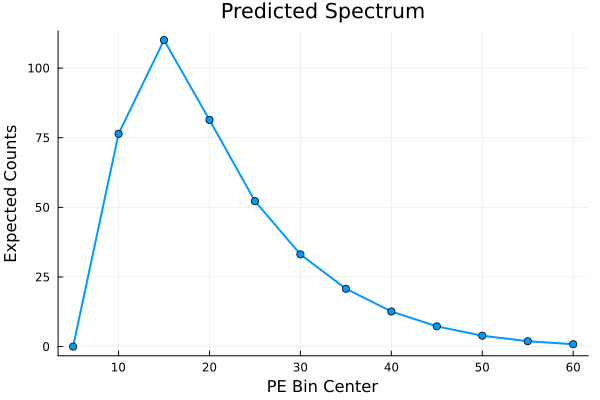

In [8]:
# plot expected counts vs out_centers
expected_counts = Newtrinos.coherent_csi.get_expected(p, e.physics, e.assets)
out_centers = e.assets.out_centers
total_expected = sum(expected_counts)
println("Total expected counts: ", total_expected)
plot(
    out_centers,
    expected_counts,
    xlabel="PE Bin Center",
    ylabel="Expected Counts",
    title="Predicted Spectrum",
    legend=false,
    lw=2,
    marker=:circle
)
display(current())

**Check Flux**

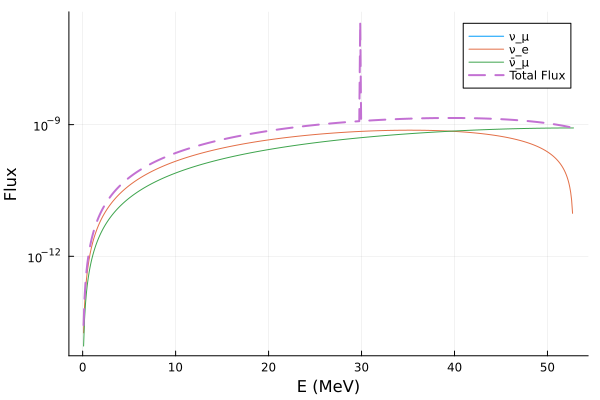

In [10]:
# Compute SNS flux and plot components
sns = Newtrinos.sns_flux.configure()
flux_result = sns.flux(exposure=13.99, distance=19.3) # values for CsI detector 

E = flux_result.E
flux_mu = flux_result.flux_mu
flux_e = flux_result.flux_e
flux_mu_bar = flux_result.flux_mu_bar
flux_total = flux_result.total_flux

function mask_positive(E, flux)
    mask = flux .> 0
    return E[mask], flux[mask]
end

E_mu, flux_mu_p = mask_positive(E, flux_mu)
E_e, flux_e_p = mask_positive(E, flux_e)
E_mu_bar, flux_mu_bar_p = mask_positive(E, flux_mu_bar)
E_total, flux_total_p = mask_positive(E, flux_total)

plot(E_mu, flux_mu_p, label="ν_μ", xlabel="E (MeV)", ylabel="Flux", legend=:topright, yscale=:log10)
plot!(E_e, flux_e_p, label="ν_e")
plot!(E_mu_bar, flux_mu_bar_p, label="ν̄_μ")
plot!(E_total, flux_total_p, label="Total Flux", lw=2, ls=:dash)
display(current())

**Check Response Matrix**

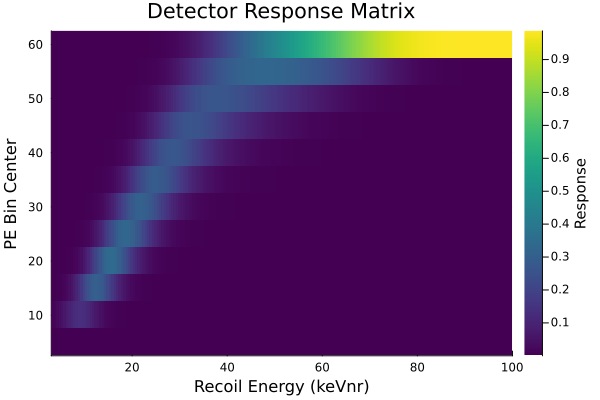

In [3]:
# Plot the detector response matrix as a heatmap
response_matrix = Newtrinos.coherent_csi.construct_response_matrix(p, e.assets)
er_centers = e.assets.er_centers
out_centers = e.assets.out_centers
heatmap(
    er_centers,
    out_centers,
    response_matrix,
    xlabel="Recoil Energy (keVnr)",
    ylabel="PE Bin Center",
    title="Detector Response Matrix",
    colorbar_title="Response",
    c = :viridis,
    clims=(maximum([minimum(response_matrix[response_matrix .> 0]), 1e-10]), maximum(response_matrix)), # avoid black for zero
    colorbar=true
)
display(current())